# Final Project for CAP6307
## Cat Baker and Darshay Blount
### Fall 2020

In [ ]:
# install modules
!pip install lyricsgenius
!pip install textblob
!python -m textblob.download_corpora

In [1]:
# import packages
from gensim.summarization import keywords
import spacy
import nltk
from nltk.corpus import stopwords
import pandas as pd
import lyricsgenius
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# download spacy and import English
nltk.download('stopwords')
from spacy.lang.en import English

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import stopwords
stopwords = set(stopwords.words('english'))

In [3]:
# Set the nlp language to English
nlp = English()
nlp.max_length = 10000000

In [4]:
# Set up the token, id, and secret for the Lyric Genius API
client_id = 'jGXOq14YmSS490yTKQ7CPzu8l7ui5v4JnbBvhIhQV8VV74cSTpoFEqoKo5NqRuTT'
client_secret = 'MCDsDPsZLCO10I9_cAOVZp91OAIFgx-aUDmaZ79hHQ9jgnquVkDROF1NBjlIisu9X2yG86OrGz7nJF26VB5nQw'
access_token = 'vcwFJvy8po5FLkEkeTeSbhkbfidq43zZqTxoBNLnEbL7tltCTbDRiVeLJ68AL2rG'

In [5]:
# Set up the API information
genius = lyricsgenius.Genius(access_token)

In [6]:
# Import the Billboard Top 100 dataset
billboard_100 = pd.read_csv('billboardHot100_1999-2019.csv')

In [7]:
# Preview the dataframe
billboard_100.head(10)

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN
5,6,Jonas Brothers,Sucker,6,1.0,17.0,2019-07-06,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",Sucker \nWe go together\nBetter than birds of ...,NaN
6,7,DaBaby,Suge,7,7.0,13.0,2019-07-06,"March 1, 2019","Trap,East Coast,Rap","Jetsonmade, Pooh beatz, Dababy","Suge \nPooh, you a fool for this one\nHa\nOh L...",NaN
7,8,Drake,Money In The Grave,8,7.0,2.0,2019-07-06,"June 15, 2019","Hip-Hop,Rap,Basketball,NBA,Canada","Asoteric, Ljay currie, Cydney christine, Rick ...","Money in the Grave \nYeah, okay\nLil CC on the...",Rick Ross
8,9,Chris Brown,No Guidance,9,9.0,3.0,2019-07-06,"June 8, 2019","Alternative R&;B,Hip-Hop,Rap,Pop,DMV,Canada,R&;B","Velous, J louis, Vinylz, Michee patrick lebrun...","No Guidance \nBefore I die I'm tryna fuck you,...",Drake
9,10,Post Malone,Wow.,10,2.0,27.0,2019-07-06,"December 24, 2018","Memes,Hip-Hop,Trap,Rap","Frank dukes, Billy walsh, Louis bell, Post malone","Wow \nSaid she tired of little money, need a b...",NaN


In [8]:
# Sort the dataframe by week ID (ascending)
billboard_100 = billboard_100.sort_values(by=['Week'])

In [9]:
# Check for null values
billboard_100.isnull().sum()

Unnamed: 0             0
Artists                0
Name                   0
Weekly.rank            0
Peak.position       7069
Weeks.on.chart      7069
Week                   0
Date               12247
Genre                  0
Writing.Credits     7213
Lyrics                 0
Features           75936
dtype: int64

In [10]:
# Filter to only show songs from the last ten years (November 2010-Dec 2019 (end of dataset))
billboard_100 = billboard_100.loc[billboard_100['Week'] > '2009-07-01']

In [11]:
billboard_100 = billboard_100.drop(['Unnamed: 0', 'Writing.Credits', 'Features'], axis=1)

In [14]:
billboard_100 = billboard_100.rename(columns={'Weekly.rank':'Rank', "Peak.position":'Peak_Rank'})

In [15]:
billboard_100.head()

,Artists,Name,Rank,Peak_Rank,Weeks.on.chart,Week,Date,Genre,Lyrics
49402,Dierks Bentley,Sideways,35,35.0,12.0,2009-07-02,"February 3, 2009",Country,"Sideways \nHey girl, what's your name?\nIt's s..."
49401,Flo Rida,Sugar,34,5.0,14.0,2009-07-02,"March 31, 2009",Rap,Sugar \nDumm\nDouble dee double di\nDouble dee...
49400,Jason Mraz,I'm Yours,33,6.0,62.0,2009-07-02,"April 15, 2008","Adult Contemporary,Adult Alternative,Pop-Rock,...",I'm Yours \nWell you done done me and you bet ...
49395,Brad Paisley,Then,28,28.0,14.0,2009-07-02,"March 23, 2009",Country,Then \nI remember trying not to stare\nThe nig...
49398,Jordin Sparks,Battlefield,31,31.0,6.0,2009-07-02,"May 8, 2009","R&;B,Pop","Battlefield \nDon't try to explain your mind, ..."


## Exploratory Data Analysis

In [282]:
# Number of unique artist/song pairs
artist_occurance = billboard_100.groupby('Artists')['Name'].nunique()

In [289]:
# List of the artists with the most unique song/artist pairs
artist_occurance.sort_values(ascending=False).head(20)

Artists
Glee Cast         195
Drake             116
Taylor Swift       61
Justin Bieber      48
Lil Wayne          48
Future             40
Meek Mill          38
Ariana Grande      37
The Weeknd         36
Eminem             35
Nicki Minaj        33
J. Cole            32
Chris Brown        32
Beyonce            29
One Direction      28
Luke Bryan         26
Rihanna            26
Kendrick Lamar     26
Kanye West         26
DJ Khaled          26
Name: Name, dtype: int64

In [275]:
# Distribution of weeks on the Billboard chart
max_weeks = billboard_100.groupby('Name')['Weeks.on.chart'].max().reset_index()
max_weeks['Weeks.on.chart'].value_counts()

20.0    564
2.0     287
3.0     169
4.0     107
18.0    106
       ... 
76.0      1
79.0      1
60.0      1
65.0      1
87.0      1
Name: Weeks.on.chart, Length: 65, dtype: int64

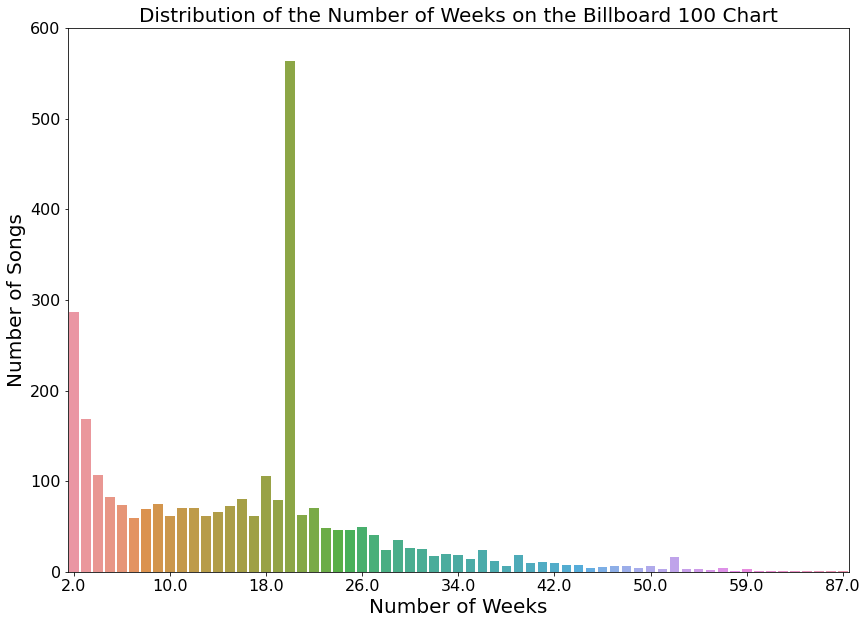

In [276]:
# Plot the distribution
plt.figure(figsize=(14,10))
sns.countplot(max_weeks['Weeks.on.chart'])
plt.title('Distribution of the Number of Weeks on the Billboard 100 Chart', fontsize=20)
plt.xlabel('Number of Weeks', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)
plt.yticks(np.arange(0, 700, 100))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.xticks(np.arange(0, 70, 8))
plt.tick_params(axis='x', which='major', labelsize=16)

In [277]:
# Look at the songs with the longest time on the charts
max_weeks.loc[max_weeks['Weeks.on.chart'] >= 55].sort_values(by = 'Weeks.on.chart', ascending=False)

,Name,Weeks.on.chart
2680,Radioactive,87.0
2838,Sail,79.0
1662,I'm Yours,76.0
703,Counting Stars,68.0
2791,Rolling In The Deep,65.0
1437,Ho Hey,62.0
792,Demons,61.0
2283,Need You Now,60.0
144,All Of Me,59.0
3026,Somebody That I Used To Know,59.0


In [ ]:
# Distribution of the peak ranks on the chart
peak_positions = billboard_100.groupby('Name')['Peak_Rank'].min().reset_index()
peak_positions['Peak_Rank'].value_counts()

In [ ]:
# Plot the distribution
plt.figure(figsize=(15,10))
sns.countplot(peak_positions['Peak_Rank'])
plt.title('Distribution of the Peak Rank of Songs on the Billboard 100 Chart', fontsize=20)
plt.xlabel('Peak Position', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)
plt.yticks(np.arange(0, 135, 10))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.xticks(np.arange(0, 100, 10))
plt.tick_params(axis='x', which='major', labelsize=16)

## Sentiment Analysis

In [241]:
# Function to return the sentiment score for each song
def lyrics_sentiment(lyrics):    
    analysis = TextBlob(lyrics)
    return analysis.sentiment.polarity

In [242]:
# Make sure everything looks good
billboard_100.head()

,Artists,Name,Rank,Peak_Rank,Weeks.on.chart,Week,Date,Genre,Lyrics,tokens,types,TTR
49402,Dierks Bentley,Sideways,35,35.0,12.0,2009-07-02,"February 3, 2009",Country,"Sideways \nHey girl, what's your name?\nIt's s...",1270.0,46.0,0.036220
49401,Flo Rida,Sugar,34,5.0,14.0,2009-07-02,"March 31, 2009",Rap,Sugar \nDumm\nDouble dee double di\nDouble dee...,3445.0,49.0,0.014224
49400,Jason Mraz,I'm Yours,33,6.0,62.0,2009-07-02,"April 15, 2008","Adult Contemporary,Adult Alternative,Pop-Rock,...",I'm Yours \nWell you done done me and you bet ...,1681.0,39.0,0.023200
49395,Brad Paisley,Then,28,28.0,14.0,2009-07-02,"March 23, 2009",Country,Then \nI remember trying not to stare\nThe nig...,1370.0,39.0,0.028467
49398,Jordin Sparks,Battlefield,31,31.0,6.0,2009-07-02,"May 8, 2009","R&;B,Pop","Battlefield \nDon't try to explain your mind, ...",2648.0,42.0,0.015861


In [243]:
# Use the sentiment function to get sentiment scores for all the song lyrics
sentiment = billboard_100.apply(lambda row: lyrics_sentiment(row['Lyrics']), axis =1)
billboard_100['Sentiment'] = sentiment

In [246]:
billboard_100.describe()

,Rank,Peak_Rank,Weeks.on.chart,tokens,types,TTR,Sentiment
count,49463.000000,45402.000000,45402.000000,49463.000000,49463.000000,49463.000000,49463.000000
mean,50.451631,36.099049,13.144113,2122.852819,45.158826,0.024170,0.089215
std,28.824776,27.629933,9.882085,900.863822,7.606434,0.011995,0.170905
min,1.000000,1.000000,0.000000,12.000000,9.000000,0.004752,-0.762449
25%,26.000000,10.000000,6.000000,1516.000000,40.000000,0.018334,-0.019661
50%,50.000000,32.000000,11.000000,1928.000000,44.000000,0.022567,0.078819
75%,75.000000,58.000000,18.000000,2573.000000,49.000000,0.027523,0.193182
max,100.000000,100.000000,87.000000,15150.000000,168.000000,0.750000,1.000000


In [400]:
billboard_100.loc[billboard_100['Weeks.on.chart'] >= 55].sort_values(by = 'Weeks.on.chart', ascending=False).drop_duplicates('Name',keep='first')

,index,Artists,Name,Rank,Peak_Rank,Weeks.on.chart,Date,Genre,Lyrics,tokens,types,TTR,Sentiment
Week,,,,,,,,,,,,,
2014-05-09,25705,Imagine Dragons,Radioactive,49,3.0,87.0,"February 14, 2012","Adult Alternative,Dubstep,Alternative Pop,Alte...",Radioactive \nWhoah-oh\nWhoah-oh\nWhoah-oh\nWh...,1212.0,36.0,0.029703,0.281618
2014-03-21,26334,AWOLNATION,Sail,45,17.0,79.0,"November 8, 2010","Electro-Pop,Pop-Rock,Alternative Rock,Industri...",Sail \nSail!\nThis is how I show my love\nI ma...,600.0,35.0,0.058333,-0.072768
2009-10-08,48082,Jason Mraz,I'm Yours,48,6.0,76.0,"April 15, 2008","Adult Contemporary,Adult Alternative,Pop-Rock,...",I'm Yours \nWell you done done me and you bet ...,1681.0,39.0,0.023200,0.223080
2014-10-17,23559,OneRepublic,Counting Stars,50,2.0,68.0,"March 25, 2013","Folk Rock,Rock,Pop,Electro-Pop,Folk,Pop-Rock","Counting Stars \nLately, I've been, I've been ...",2810.0,42.0,0.014947,-0.098085
2012-04-13,35793,Adele,Rolling In The Deep,49,1.0,65.0,"November 29, 2010","Pop,Blues,Adult Alternative,Adult Contemporary...",Rolling in the Deep \nThere's a fire starting ...,2722.0,43.0,0.015797,0.084680
2013-08-23,29112,The Lumineers,Ho Hey,50,3.0,62.0,"April 3, 2012","Adult Alternative,Adult Contemporary,Pop,Pop-R...",Ho Hey \nI been trying to do it right\nI been ...,870.0,36.0,0.041379,0.078571
2014-07-04,24969,Imagine Dragons,Demons,47,6.0,61.0,"February 14, 2012","Adult Alternative,Adult Contemporary,Alternati...",Demons \nWhen the days are cold and the cards ...,1525.0,38.0,0.024918,-0.190046
2010-10-14,43069,Lady Antebellum,Need You Now,48,2.0,60.0,"August 11, 2009",Country,Need You Now \nPicture perfect memories\nScatt...,1019.0,39.0,0.038273,-0.053571
2014-12-05,22894,John Legend,All Of Me,43,1.0,59.0,"August 12, 2013","Piano,Easy Listening,Adult Contemporary,Soul P...",All of Me \nWhat would I do without your smart...,1679.0,43.0,0.025610,0.262242


In [395]:
max_weeks_total.head()

,Name,Weeks.on.chart
0,...Ready For It?,20.0
1,0 To 100 / The Catch Up,20.0
2,1,42.0
3,1.5,NaN
4,10 Bands,13.0


In [244]:
# Drop duplicate occurances of songs and create a new dataframe
billboard_100_sentiment = billboard_100.drop_duplicates(subset=['Name'], keep='last')

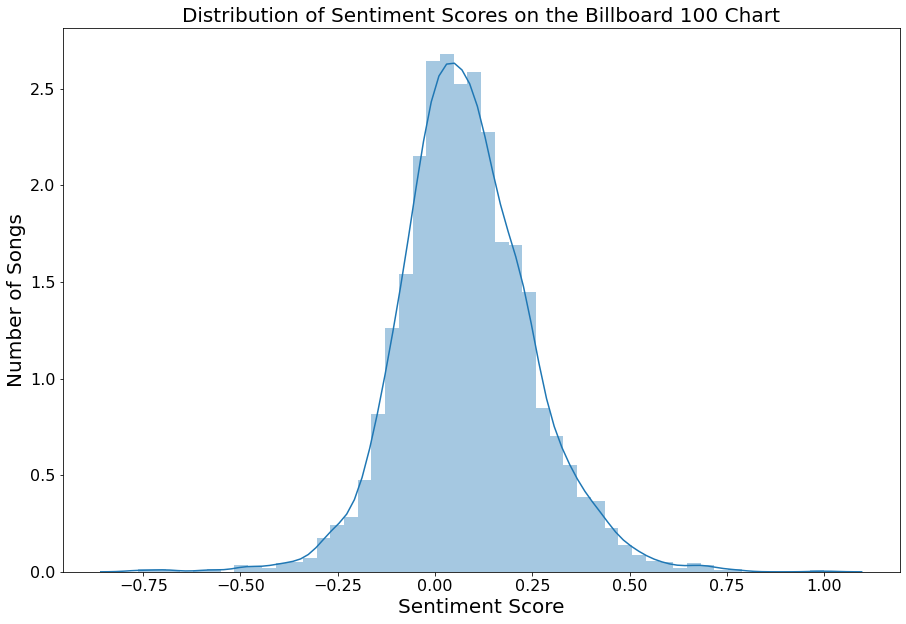

In [245]:
# Distribution of lyric sentiment score
plt.figure(figsize=(15,10))
sns.distplot(billboard_100_sentiment['Sentiment'])
plt.title('Distribution of Sentiment Scores on the Billboard 100 Chart', fontsize=20)
plt.xlabel('Sentiment Score', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

In [298]:
# Set the index to be the weekid
billboard_100.reset_index(inplace=True)

In [299]:
# Set the index of the dataframe to the WeekID. 
# This sets us up to resample dataframe based on time
billboard_100['Week'] = pd.to_datetime(billboard_100['Week'],infer_datetime_format=True)
billboard_100 = billboard_100.sort_values(by='Week')
billboard_100 = billboard_100.reset_index(drop=True)
billboard_100 = billboard_100.set_index('Week')

In [300]:
# Resample dataframe sentiment column by year. This arranges the mean lyric sentiment for every year
billboard_100_resample = billboard_100['Sentiment'].resample('Y').mean()

In [301]:
# Print the average sentiment scores for each year
billboard_100_resample.head(12)

Week
2009-12-31    0.109898
2010-12-31    0.115367
2011-12-31    0.094688
2012-12-31    0.114984
2013-12-31    0.104620
2014-12-31    0.082186
2015-12-31    0.086326
2016-12-31    0.091607
2017-12-31    0.070188
2018-12-31    0.045563
2019-12-31    0.068603
Freq: A-DEC, Name: Sentiment, dtype: float64

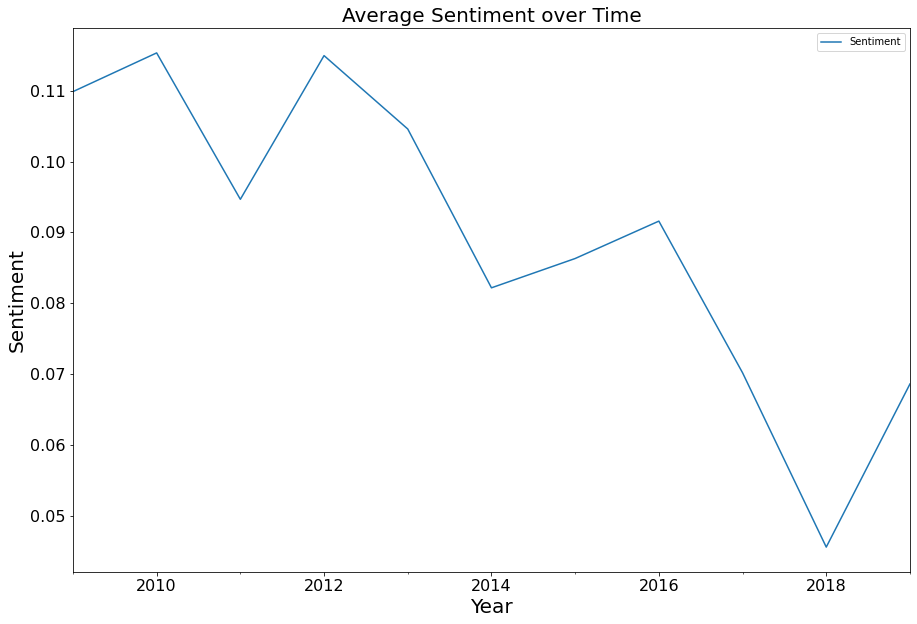

In [302]:
# Plot lyric sentiment over time by year
plt.figure(figsize=(15,10))
billboard_100_resample.plot(label='Sentiment', legend=True)
plt.title('Average Sentiment over Time', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sentiment', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

In [305]:
# Sentiment score by month
billboard_100_resample = billboard_100['Sentiment'].resample('M').mean()

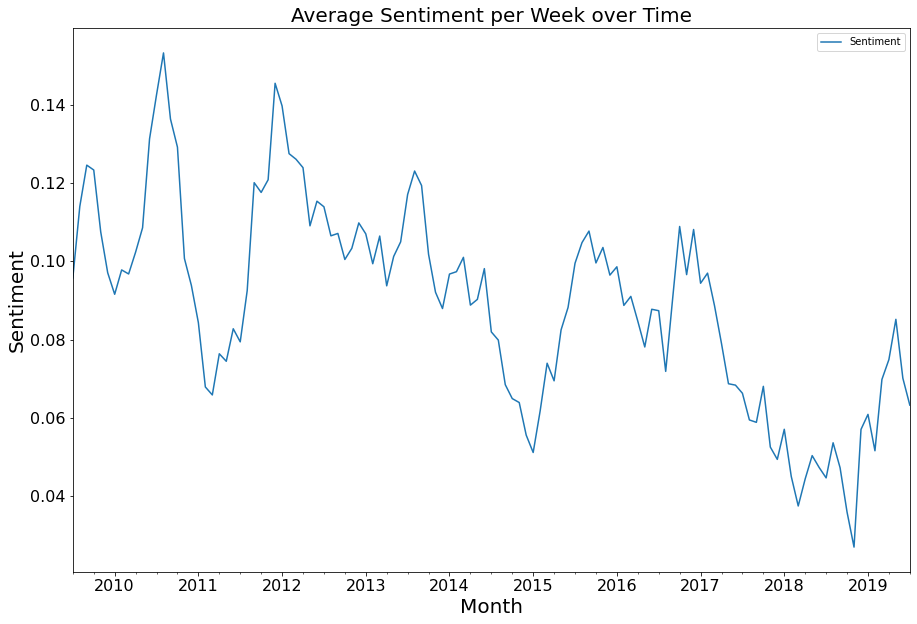

In [306]:
#Plot lyric sentiment by month
plt.figure(figsize=(15,10))
billboard_100_resample.plot(label='Sentiment', legend=True)
plt.title('Average Sentiment per Week over Time', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sentiment', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

In [303]:
# Lyric sentiment by week
billboard_100_resample = billboard_100['Sentiment'].resample('W').mean()

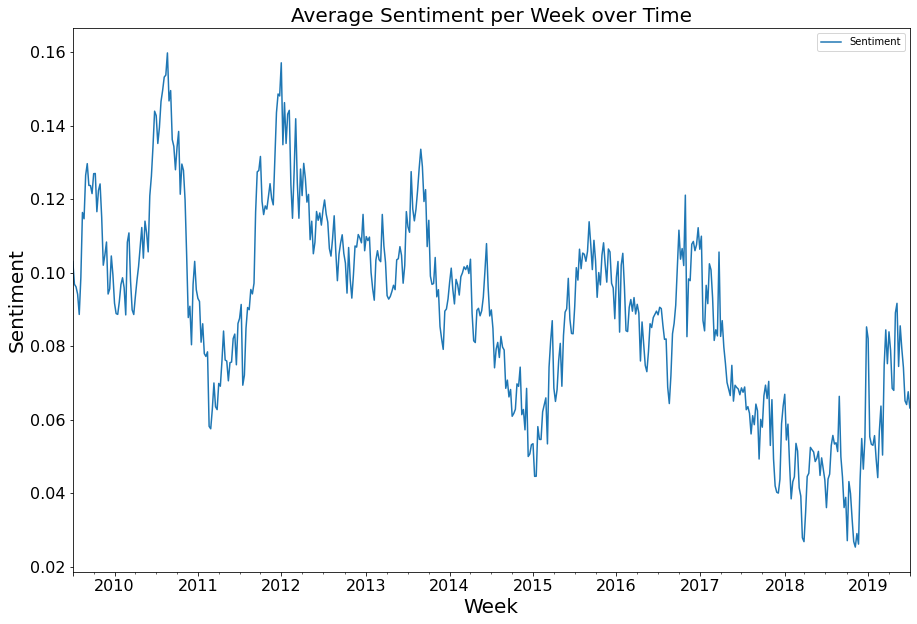

In [304]:
#Plot lyric sentiment by week
plt.figure(figsize=(15,10))
billboard_100_resample.plot(label='Sentiment', legend=True)
plt.title('Average Sentiment per Week over Time', fontsize=20)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Sentiment', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

In [391]:
high_sentiment = billboard_100.loc[billboard_100['Sentiment'] >= 0.75]

## Text Analysis

In [16]:
# Create a dataframe with the lyrics
billboard_lyrics = billboard_100.filter(['Name', 'Artists', 'Lyrics', 'Week'], axis=1)

In [17]:
billboard_lyrics.head()

,Name,Artists,Lyrics,Week
49402,Sideways,Dierks Bentley,"Sideways \nHey girl, what's your name?\nIt's s...",2009-07-02
49401,Sugar,Flo Rida,Sugar \nDumm\nDouble dee double di\nDouble dee...,2009-07-02
49400,I'm Yours,Jason Mraz,I'm Yours \nWell you done done me and you bet ...,2009-07-02
49395,Then,Brad Paisley,Then \nI remember trying not to stare\nThe nig...,2009-07-02
49398,Battlefield,Jordin Sparks,"Battlefield \nDon't try to explain your mind, ...",2009-07-02


In [18]:
# Change all to lowercase and remove all punctuation
def clean_text(x):
    punc='!"'',.@#$%^&*()-_+:;?><[]{}`~1234567890'
    lowercase = x.lower()
    for ch in punc:
        lowercase = lowercase.replace(ch,'')
    return lowercase

In [19]:
# Apply the function to the lyrics
billboard_lyrics.Lyrics = billboard_lyrics.apply(lambda row: clean_text(row['Lyrics']), axis=1)

In [20]:
# Function to perfrom keyword extraction
def keyword_extract(texts):
    xkeywords = []
    values = keywords(text=clean_text(texts), split='\n', scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords
    except:
        return 'there is no content'

In [21]:
# Apply the function to the lyrics and create a column to store the keywords
keywords = billboard_lyrics.apply(lambda row: keyword_extract(row['Lyrics']), axis=1)

billboard_lyrics['Keywords'] = keywords

In [22]:
# Convert to datetime
pd.to_datetime(billboard_lyrics['Week'], infer_datetime_format = True)

49402   2009-07-02
49401   2009-07-02
49400   2009-07-02
49395   2009-07-02
49398   2009-07-02
           ...    
70      2019-07-06
71      2019-07-06
72      2019-07-06
62      2019-07-06
0       2019-07-06
Name: Week, Length: 49463, dtype: datetime64[ns]

In [25]:
billboard_lyrics.describe()

,Name,Artists,Lyrics,Week,Keywords
count,49463,49463,49463,49463,49463
unique,3886,1138,4211,523,18890
top,Radioactive,Drake,radioactive \nwhoahoh\nwhoahoh\nwhoahoh\nwhoah...,2019-04-06,[]
freq,92,1083,87,100,315


In [30]:
no_dupes = billboard_lyrics.value_counts(['Name', 'Artists'])

In [31]:
no_dupes.describe()

count    4215.000000
mean       11.734994
std        11.480623
min         1.000000
25%         1.000000
50%         9.000000
75%        20.000000
max        87.000000
dtype: float64

In [28]:
no_duplicates = billboard_lyrics.drop_duplicates(subset='Lyrics', keep='first')

In [29]:
no_duplicates.describe()

,Name,Artists,Lyrics,Week,Keywords
count,4211,4211,4211,4211,4211
unique,3885,1138,4211,523,4164
top,Hallelujah,Glee Cast,first of the year equinox \ndenodnaba eht rof\...,2009-07-02,[]
freq,7,192,1,94,31


In [41]:
# To Datetime
billboard_lyrics['Week'] = pd.to_datetime(billboard_lyrics['Week'],infer_datetime_format=True)
billboard_lyrics = billboard_lyrics.sort_values(by='Week')
billboard_lyrics = billboard_lyrics.reset_index(drop=True)
billboard_lyrics = billboard_lyrics.set_index('Week')

In [42]:
# Get the keywords for each year
billboard_lyrics_year = billboard_lyrics['Keywords'].resample('Y').sum()

In [43]:
# Take a peek
billboard_lyrics_year.head()

Week
2009-12-31    [sideways hey, play, stuff, bit, ain, says, cr...
2010-12-31    [camera, starts, talk like, heartbreak warfare...
2011-12-31    [drink, smoke, feel, feeling, away, break, sit...
2012-12-31    [makes, little suitcase, ego making, business,...
2013-12-31    [ready, like, fly yeah, battaboom, lalalalalal...
Freq: A-DEC, Name: Keywords, dtype: object

In [47]:
# Write the series to a CSV
billboard_lyrics_year.to_csv('billboard_lyrics_year.csv')

### Wordclouds

In [213]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS

In [326]:
# Set the file to the lyrics CSV
text = open('billboard_lyrics_year.csv').read()

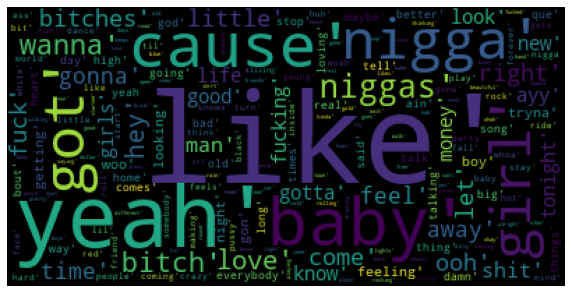

In [328]:
# Create the wordcloud from the keywords
wordcloud = WordCloud(stopwords=STOP_WORDS, collocations=False).generate(text)

# Generate plot
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [347]:
# 2010 Wordcloud
text = pd.read_csv('billboard_lyrics_year.csv')
text = text['Keywords'].iloc[1]

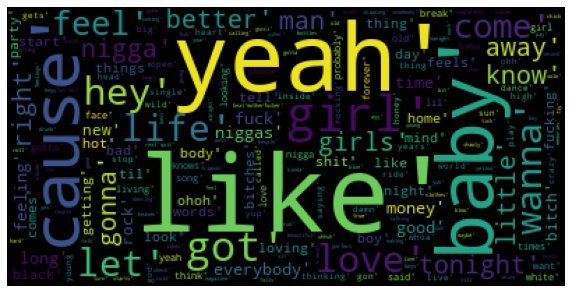

In [348]:
# Create the wordcloud
wordcloud = WordCloud(stopwords=STOP_WORDS, collocations=False).generate(text)

# Generate plot
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

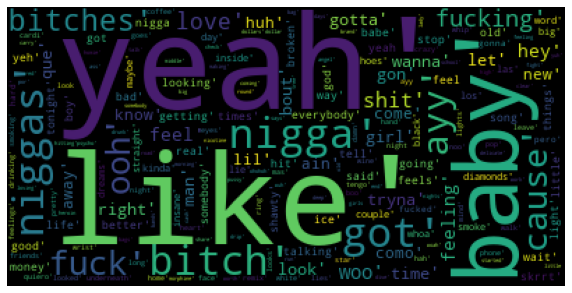

In [350]:
# 2018 Wordcloud
text = pd.read_csv('billboard_lyrics_year.csv')
text = text['Keywords'].iloc[9]


wordcloud = WordCloud(stopwords=STOPWORDS, collocations=False).generate(str(text))

# Generate plot
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Type-to-Token Ratio

In [167]:
texts = billboard_100['Lyrics']

In [168]:
# Tokens of each song
tokens = [len(text) for text in texts]

billboard_100['tokens'] = tokens

In [169]:
# Types of each song 
types = [len(set(text)) for text in texts]

billboard_100['types'] = types

In [170]:
# Apply the functions
billboard_100['tokens'] = billboard_100['tokens'].apply(lambda x: float(x))
billboard_100['types'] = billboard_100['types'].apply(lambda x: float(x))

In [171]:
# Calculate the type-to-token ratio
ttr = billboard_100['types']/billboard_100['tokens']

billboard_100['TTR'] = ttr

In [259]:
# Print the descriptives for tokens, types, TTR
billboard_100.describe()

,Rank,Peak_Rank,Weeks.on.chart,tokens,types,TTR,Sentiment
count,49463.000000,45402.000000,45402.000000,49463.000000,49463.000000,49463.000000,49463.000000
mean,50.451631,36.099049,13.144113,2122.852819,45.158826,0.024170,0.089215
std,28.824776,27.629933,9.882085,900.863822,7.606434,0.011995,0.170905
min,1.000000,1.000000,0.000000,12.000000,9.000000,0.004752,-0.762449
25%,26.000000,10.000000,6.000000,1516.000000,40.000000,0.018334,-0.019661
50%,50.000000,32.000000,11.000000,1928.000000,44.000000,0.022567,0.078819
75%,75.000000,58.000000,18.000000,2573.000000,49.000000,0.027523,0.193182
max,100.000000,100.000000,87.000000,15150.000000,168.000000,0.750000,1.000000


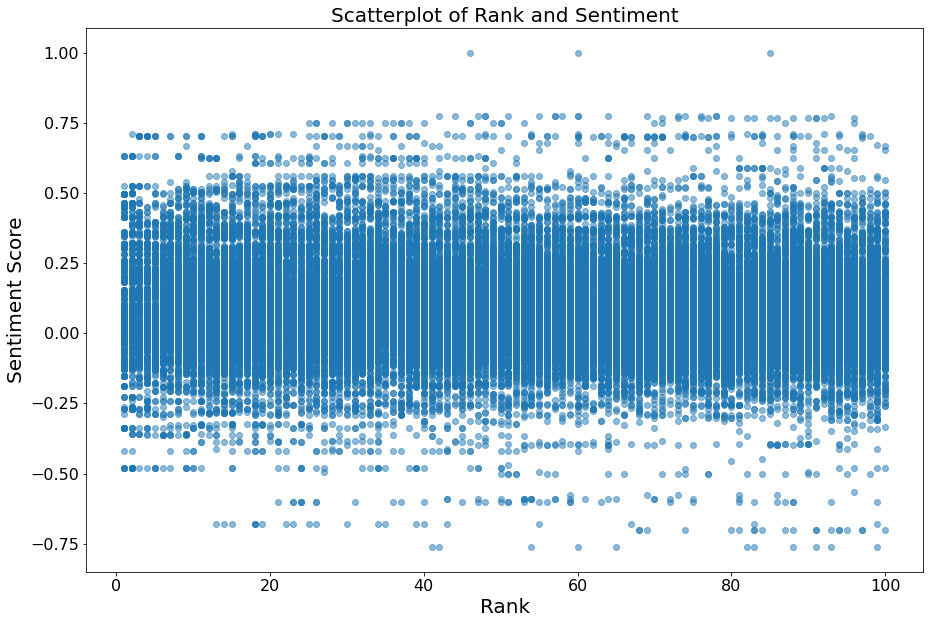

In [271]:
x = billboard_100['Rank']
y = billboard_100['Sentiment']

plt.figure(figsize=(15,10))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatterplot of Rank and Sentiment', fontsize=20)
plt.ylabel('Sentiment Score', fontsize=20)
plt.xlabel('Rank', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Count Vectorization

In [230]:
from sklearn.feature_extraction.text import CountVectorizer

In [234]:
text = open('billboard_lyrics_year.csv').read()

In [235]:
vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform([text])
matrix

<1x6345 sparse matrix of type '<class 'numpy.int64'>'
	with 6345 stored elements in Compressed Sparse Row format>

In [236]:
# View the counts of the top words in the lyrics
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())

counts.T.sort_values(by=0, ascending=False).head(25)

,0
like,15455
yeah,12044
baby,6972
cause,5992
got,4965
nigga,4858
girl,4606
niggas,4348
wanna,3472
bitch,3223


In [420]:
filtered_words = [word for word in billboard_100['Lyrics'] if word not in stopwords.words('english')]


In [424]:
# Tokenize the data using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
df = cv.fit_transform(filtered_words)

In [425]:
# Set the LDA parameters and fit it to the dataframe
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 5, random_state = 42)
lda.fit(df)

LatentDirichletAllocation(n_components=5, random_state=42)

In [426]:
# Print the LDA components with the top 10 words 
for index, topic in enumerate(lda.components_):
    print(f'Top 10 words for Topic #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for Topic #0
['wanna', 'girl', 'let', 'got', 'know', 'baby', 'just', 'don', 'like', 'love']


Top 10 words for Topic #1
['life', 'love', 'cause', 'hey', 'don', 've', 'just', 'like', 'know', 'll']


Top 10 words for Topic #2
['just', 'fuck', 'ain', 'nigga', 'bitch', 'yeah', 'know', 'like', 'don', 'got']


Top 10 words for Topic #3
['love', 'don', 'know', 'let', 'baby', 'want', 'like', 'ooh', 'yeah', 'oh']


Top 10 words for Topic #4
['mi', 'el', 'ya', 'yo', 'oh', 'te', 'tu', 'like', 'que', 'la']


